<h1>Exploratory Data Analysis</h1>

<h4>Imports</h4>

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<h3>Load Data</h3>

In [32]:
train_data = pd.read_csv("kmaml223/train.csv")
test_data = pd.read_csv("kmaml223/test.csv")


<h3>Dataset columns</h3>
<p>There is a 'comment_text_cleaned' column which is not present in the original dataset. This column is generated by the text_clenup.ipynb script. It contains processed and cleaned text from the 'comment_text' column to not clean it every time. The process of cleaning is described in the corresponding notebook :)</p>

In [33]:
# Display debug information
print("Test Data:")
print(f"Columns: {list(test_data.columns)}")
print()

print("Train Data:")
print(f"Columns: {list(train_data.columns)}")
print()

Test Data:
Columns: ['Unnamed: 0', 'id', 'comment_text', 'comment_text_cleaned']

Train Data:
Columns: ['id', 'comment_text', 'toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate', 'comment_text_cleaned']



<h2>Data Visualisation</h2>

<h3>Number of Samples in datasets</h3>

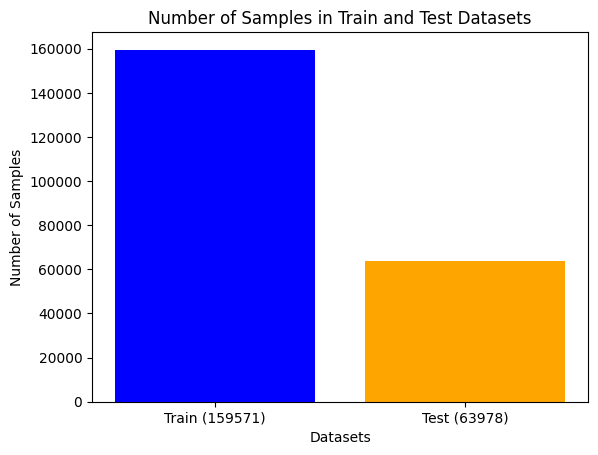

In [34]:
# Get the number of samples in each dataset
train_samples = len(train_data)
test_samples = len(test_data)

# Create a bar chart to visualize the number of samples
labels = [f'Train ({train_samples})', f'Test ({test_samples})']
samples = [train_samples, test_samples]

plt.bar(labels, samples, color=['blue', 'orange'])
plt.xlabel('Datasets')
plt.ylabel('Number of Samples')
plt.title('Number of Samples in Train and Test Datasets')
plt.show()

<h3>Text Length Frequency Distribution (Not Cleaned vs Cleaned)</h3>
<p>The histograms display the distribution of text lengths in the train and test datasets, revealing the prevalence of specific lengths within 'Original' and 'Cleaned' text categories. These visualizations offer insights into the frequency of text lengths present in each dataset, aiding in comparative analysis between the train and test data.</p>

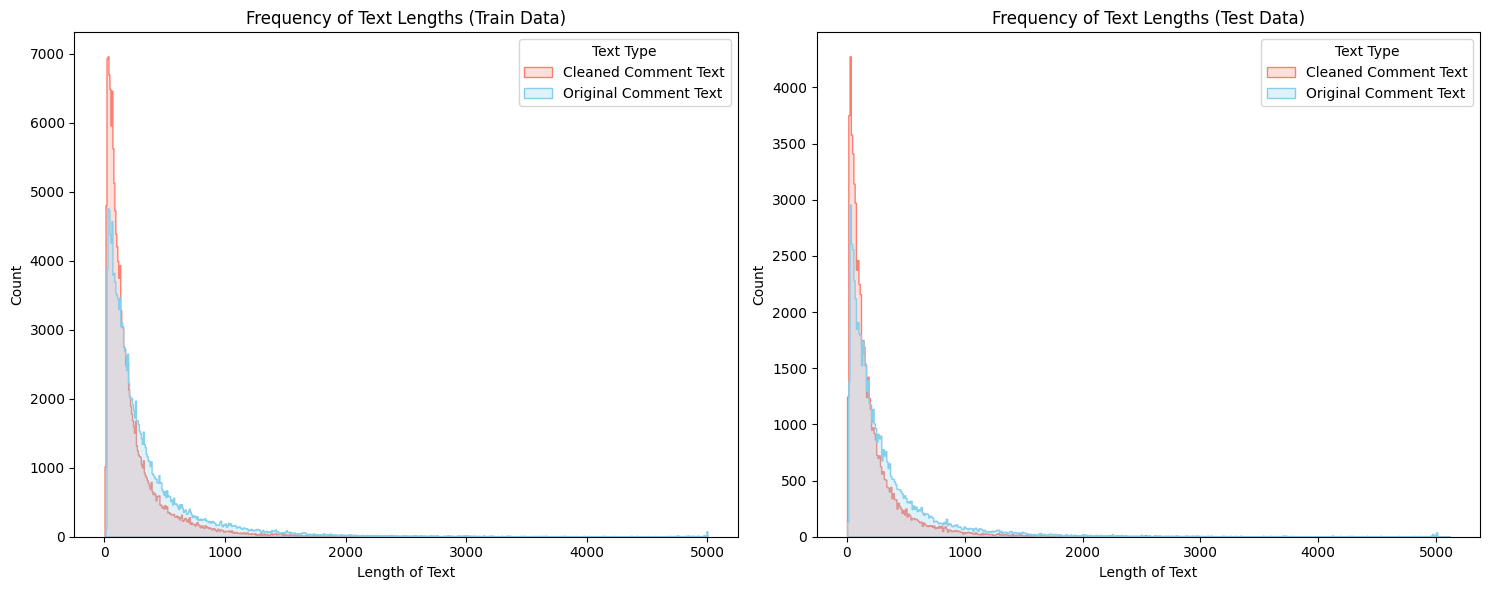

In [40]:
# Sample data
comment_text_train = train_data['comment_text']
comment_text_train_cleaned = train_data['comment_text_cleaned']

# Combine both columns into a single DataFrame
combined_df_train = pd.DataFrame({
    'Text Type': ['Original'] * len(comment_text_train) + ['Cleaned'] * len(comment_text_train_cleaned),
    'Length': list(comment_text_train.str.len()) + list(comment_text_train_cleaned.str.len())
})

# Sample data
comment_text_test = test_data['comment_text']
comment_text_test_cleaned = test_data['comment_text_cleaned']

# Combine both columns into a single DataFrame
combined_df_test = pd.DataFrame({
    'Text Type': ['Original'] * len(comment_text_test) + ['Cleaned'] * len(comment_text_test_cleaned),
    'Length': list(comment_text_test.str.len()) + list(comment_text_test_cleaned.str.len())
})

# Define colors for each text type
colors = {'Original': 'skyblue', 'Cleaned': 'salmon'}

# Plotting both train and test data comparisons side by side
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

sns.histplot(data=combined_df_train, x='Length', hue='Text Type', element='step', stat='count', palette=colors, ax=axes[0])
axes[0].set_title('Frequency of Text Lengths (Train Data)')
axes[0].set_xlabel('Length of Text')
axes[0].set_ylabel('Count')
axes[0].legend(title='Text Type', labels=['Cleaned Comment Text', 'Original Comment Text'])

sns.histplot(data=combined_df_test, x='Length', hue='Text Type', element='step', stat='count', palette=colors, ax=axes[1])
axes[1].set_title('Frequency of Text Lengths (Test Data)')
axes[1].set_xlabel('Length of Text')
axes[1].set_ylabel('Count')
axes[1].legend(title='Text Type', labels=['Cleaned Comment Text', 'Original Comment Text'])

plt.tight_layout()
plt.show()

<h3>Distribution of Non-zero Labels in Training Data</h3>
<p>The pie charts visualize the distribution of non-zero occurrences across toxicity labels ('toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate') within the training dataset. Each chart depicts the proportion of text samples exhibiting non-zero scores against the respective label, offering a clear overview of the prevalence of these toxic attributes in the dataset.</p>

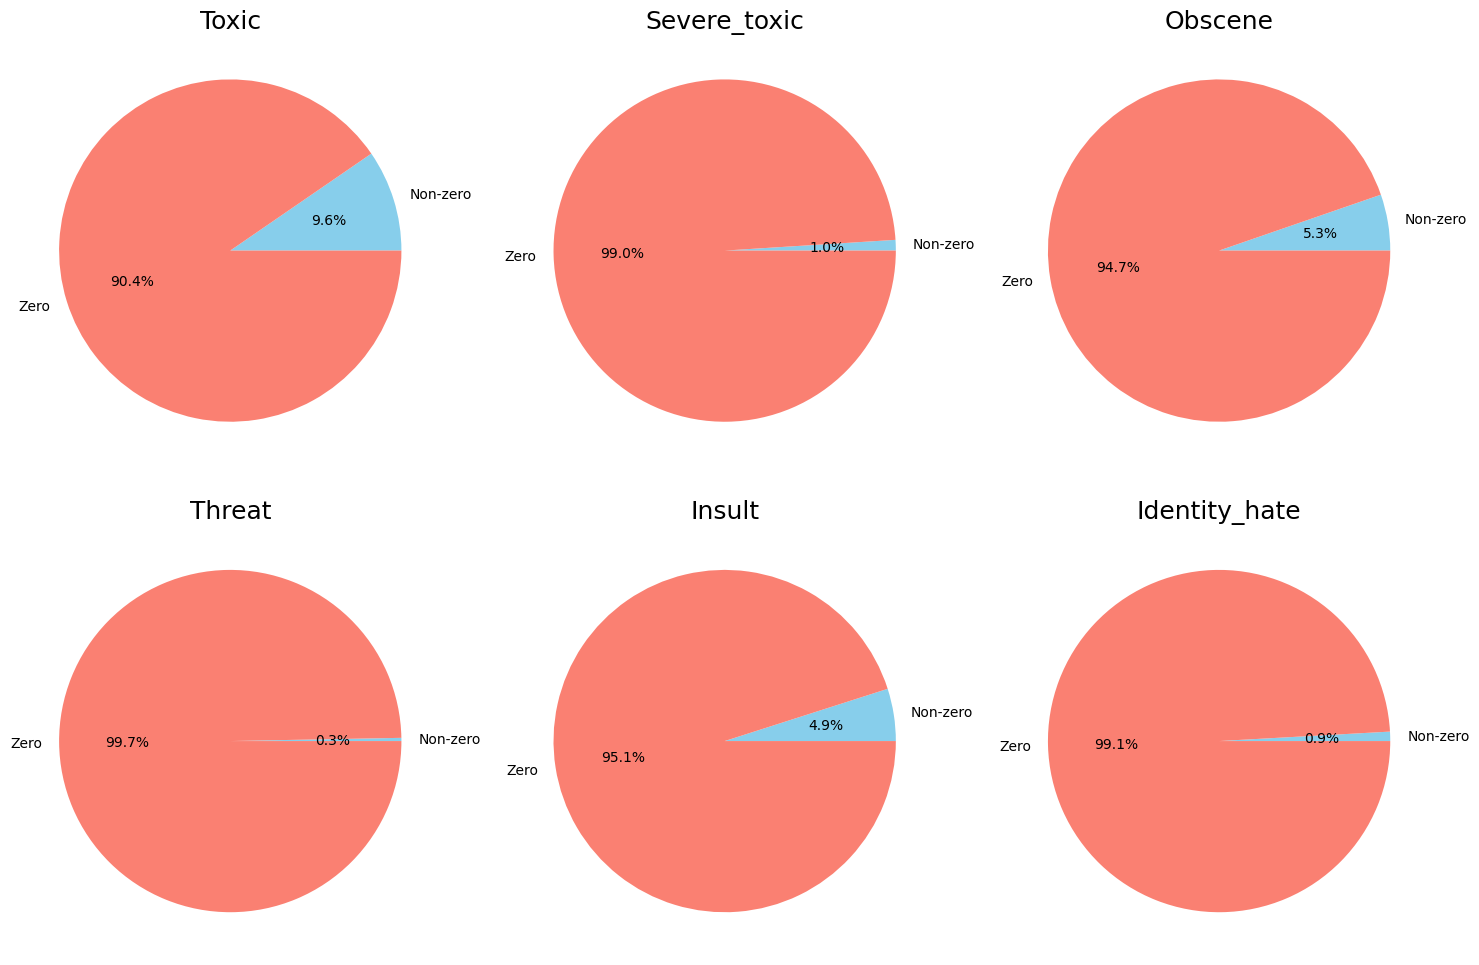

In [36]:
# List of label columns
labels = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']

# Count the number of samples where each label is greater than zero
counts = train_data[labels].apply(lambda x: (x > 0).sum())

# Plotting
plt.figure(figsize=(15, 10))

for i, label in enumerate(labels):
    plt.subplot(2, 3, i + 1)
    sizes = [counts[label], len(train_data) - counts[label]]
    labels_pie = ['Non-zero', 'Zero']
    plt.pie(sizes, labels=labels_pie, autopct='%1.1f%%', colors=['skyblue', 'salmon'])
    plt.title(label.capitalize(), fontsize=18)

plt.tight_layout()
plt.show()

<h3>Distribution of Positive Labels in Training Data</h3>
<p>These histograms depict the frequency distribution of positive occurrences for toxicity labels ('toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate') within the training dataset. Each histogram showcases the distribution of values greater than zero for the corresponding label, providing insights into the frequency and concentration of these specific toxic attributes within the dataset.</p>

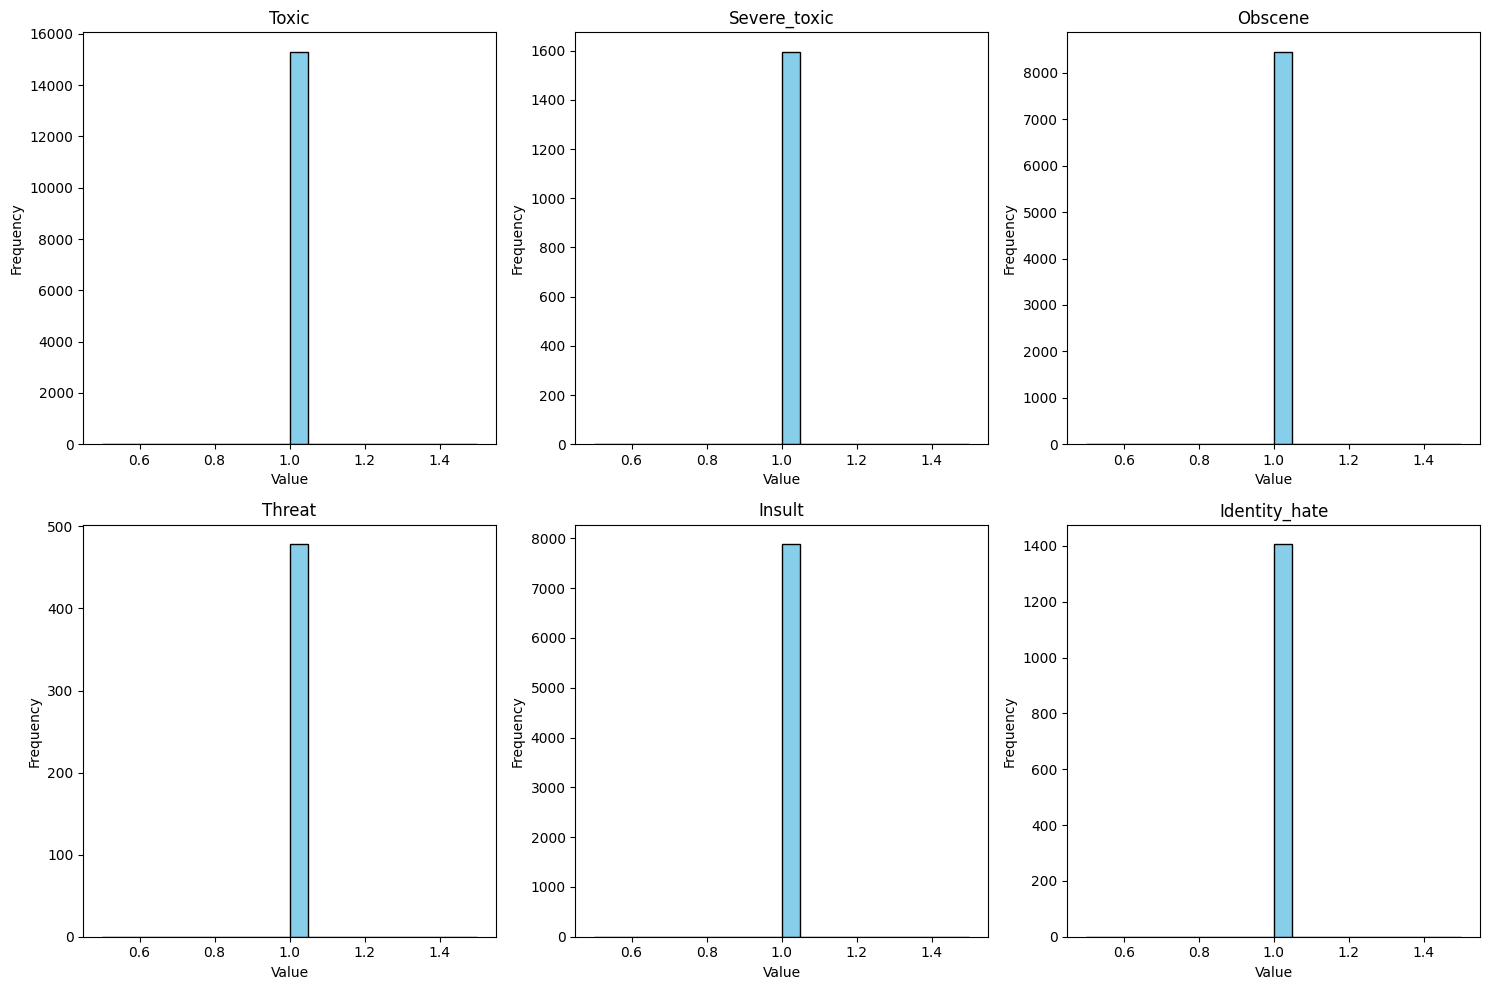

In [37]:
# List of label columns
labels = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']

# Plotting
plt.figure(figsize=(15, 10))

for i, label in enumerate(labels):
    # Filter data where label values are greater than zero
    filtered_data = train_data[train_data[label] > 0][label]
    
    plt.subplot(2, 3, i + 1)
    plt.hist(filtered_data, bins=20, color='skyblue', edgecolor='black')
    plt.title(label.capitalize())
    plt.xlabel('Value')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

<p>The observations indicate that within the analyzed dataset, only singular values (1) are present for the examined toxic attributes, implying a likely binary representation where values greater than zero signify the presence of a specific toxicity attribute.</p>

<h3>Frequency of Co-occurring Toxicity Labels</h3>
<p>The heatmap visualizes the frequency of co-occurrences among various toxicity labels ('toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate') within the training dataset. Each cell represents the count of samples where the corresponding pair of labels simultaneously exhibits values greater than zero, offering insights into potential associations and co-occurrences among different toxic attributes.</p>

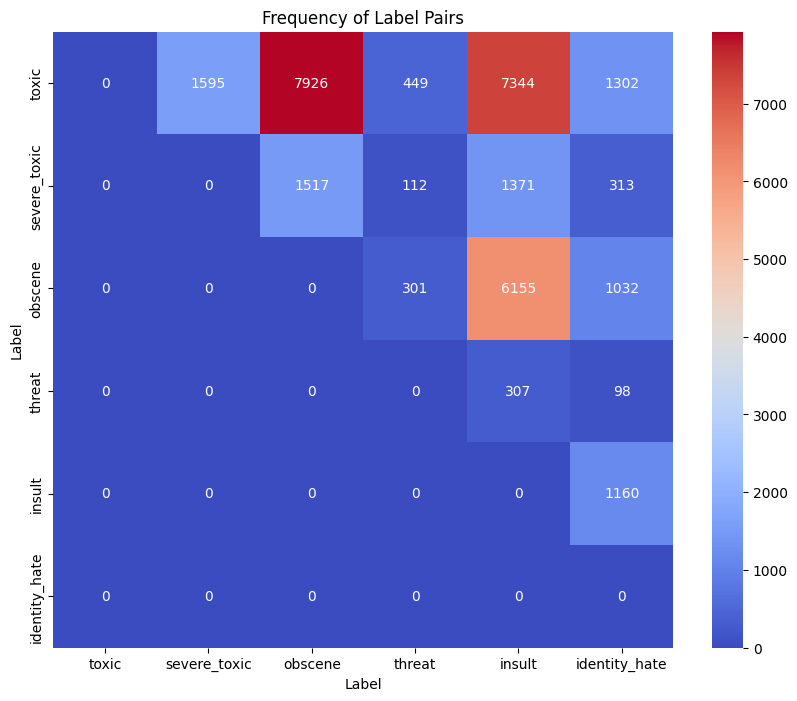

In [41]:
# List of label columns
labels = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']

# Create an empty DataFrame to store pair counts
pair_counts = pd.DataFrame(0, columns=labels, index=labels)

# Calculate pair counts for distinct label pairs
for i, label1 in enumerate(labels):
    for j, label2 in enumerate(labels):
        if i < j:  # Process pairs once avoiding duplicate pairs
            pair_counts.loc[label1, label2] = ((train_data[label1] > 0) & (train_data[label2] > 0)).sum()

# Generate a heatmap for pair frequencies
plt.figure(figsize=(10, 8))
sns.heatmap(pair_counts, annot=True, fmt='d', cmap='coolwarm')
plt.title('Frequency of Label Pairs')
plt.xlabel('Label')
plt.ylabel('Label')

plt.show()

<p>The horizontal bar chart illustrates the frequency of unique co-occurring pairs among various toxicity labels ('toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate') within the training dataset. Displaying pairs only once and sorted by frequency, this visualization highlights the most prevalent associations between different toxic attributes, aiding in understanding the concurrent presence of these labels within the dataset.</p>

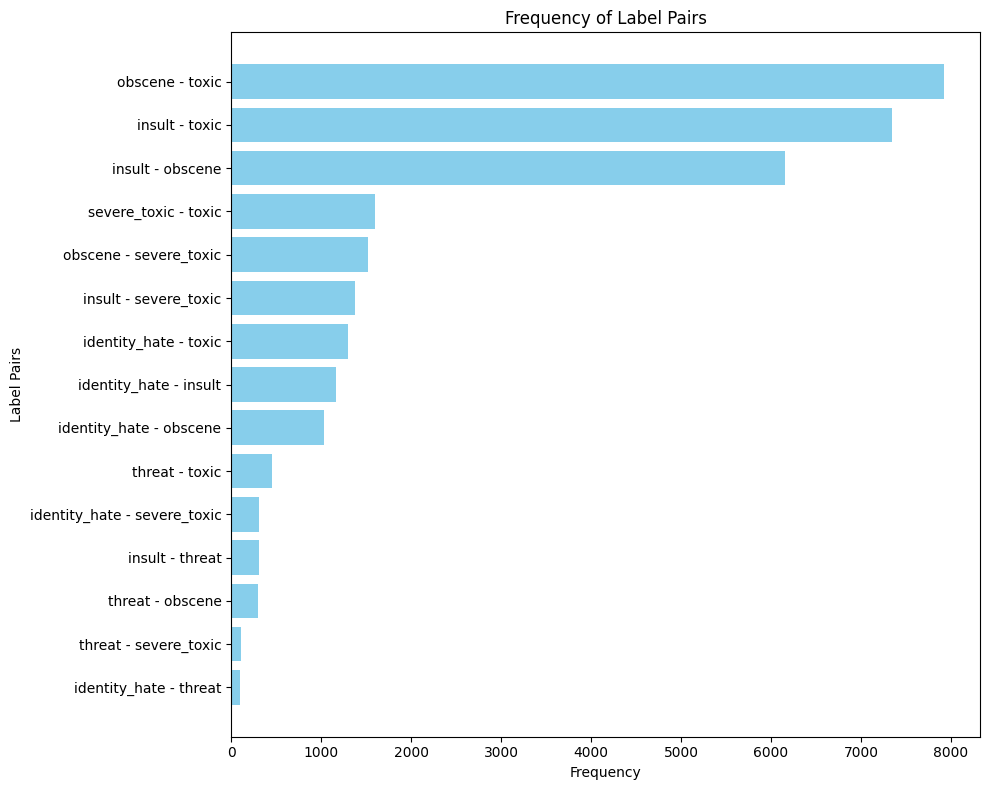

In [39]:
# List of label columns
labels = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']

# Create an empty DataFrame to store pair counts
pair_counts = pd.DataFrame(0, columns=labels, index=labels)

# Calculate pair counts for distinct label pairs
for i, label1 in enumerate(labels):
    for j, label2 in enumerate(labels):
        if i < j:  # Process pairs once avoiding duplicate pairs
            pair_counts.loc[label1, label2] = ((train_data[label1] > 0) & (train_data[label2] > 0)).sum()

# Flatten the DataFrame to prepare for plotting
flat_pair_counts = pair_counts.unstack().reset_index()
flat_pair_counts.columns = ['Label 1', 'Label 2', 'Frequency']

# Filter out pairs with frequency zero
flat_pair_counts = flat_pair_counts[flat_pair_counts['Frequency'] > 0]

# Sort by frequency in descending order
flat_pair_counts = flat_pair_counts.sort_values(by='Frequency')

# Plotting a horizontal bar chart
plt.figure(figsize=(10, 8))
plt.barh(y=flat_pair_counts['Label 1'] + ' - ' + flat_pair_counts['Label 2'],
         width=flat_pair_counts['Frequency'], color='skyblue')
plt.xlabel('Frequency')
plt.title('Frequency of Label Pairs')
plt.ylabel('Label Pairs')

plt.tight_layout()
plt.show()